In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=54, test_size=0.33)

In [7]:
X_test

array([[ 0.08166637, -0.04464164,  0.03367309, ...,  0.03430886,
         0.03486419,  0.06933812],
       [-0.00914709, -0.04464164, -0.05686312, ...,  0.03430886,
        -0.00991896, -0.01764613],
       [ 0.01628068, -0.04464164,  0.01750591, ..., -0.00259226,
         0.03723201, -0.0010777 ],
       ...,
       [-0.00188202, -0.04464164, -0.06656343, ..., -0.00259226,
        -0.02028875, -0.02593034],
       [-0.04183994,  0.05068012,  0.01427248, ...,  0.07120998,
         0.03546194, -0.01350402],
       [ 0.04170844, -0.04464164, -0.00836158, ..., -0.0763945 ,
        -0.08023654, -0.01764613]])

In [36]:
coefi=[]#alpha
mserrs=[]#mse errors

for alpha in np.linspace(0.1,0.9,10):
    model1 = Lasso(random_state=42,alpha=alpha)
   # print(alpha)
    model1.fit(X_train, y_train)
   # print(model1.get_params())
    y_pr=model1.predict(X_test)
    mse=mean_squared_error(y_test,y_pr)
    mserrs.append(mse)
    coefi.append(alpha)
index=np.array(mserrs).argmin();
l=coefi[index]
res=round(mserrs[index],3)
res

3075.576

In [37]:
model2=LinearRegression()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
mse2=mean_squared_error(y_pred,y_test)
answer5=round(mse2,3)
answer5

3015.288

Text(0.5, 1.0, 'MSE(aplha)')

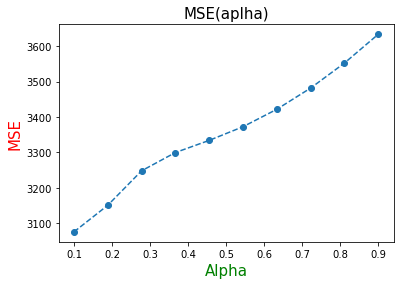

In [38]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(coefi, mserrs,'--o')
plt.xlabel('Alpha', fontdict={'fontsize':15}, color='green')
plt.ylabel('MSE', fontdict={'fontsize':15},color='red')
plt.title('MSE(aplha)', fontdict={'fontsize':15})
